**4A. Generate 61 points fortarget = sin x , where x ∈ [−3, 3]. Use this dataset to train
two layer neural networks using gradient descent learning algorithm. Draw two curves with
different colours, for target and output(y) of the trained neural network.**

In [3]:
#Implementing first for the single layer Sin function neuron

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x_values = np.linspace(-3,3,61)
y_values = np.sin(x_values)


In [6]:
def Sin(x):
  return np.sin(x)

def Sin_derivative(x):
  return np.cos(x)

w=np.random.rand()
b=np.random.rand()

learning_rate=0.1
epochs=1000

for epoch in range(epochs):
  func = Sin(w*x_values + b)
  loss = np.mean((func - y_values)**2)

  grad_w = np.mean((func-y_values)*Sin_derivative(w* x_values + b )*x_values)
  grad_b = np.mean((func-y_values)*Sin_derivative(w* x_values + b ))

  w-=learning_rate * grad_w
  b-=learning_rate * grad_b


In [7]:
print("W1:",w,"and","b:",b)

W1: 0.9999999999999998 and b: 1.3814598067046125e-17


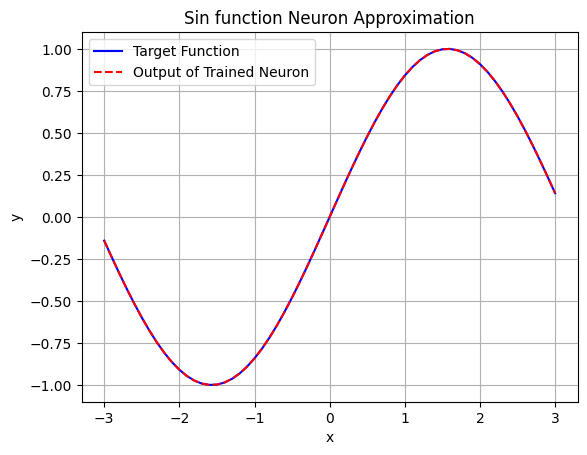

In [8]:
# Plotting the target function and output of the trained neuron
plt.plot(x_values, y_values, label='Target Function', color='blue')
plt.plot(x_values, func, label='Output of Trained Neuron', color='red',linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Sin function Neuron Approximation')
plt.legend()
plt.show()

## **Actual Answer**

In [9]:
import numpy as np
# Generate 61 points for x in the range [-3, 3]
x = np.linspace(-3, 3, 61)
# Compute the target sin(x) for each x
y_true = np.sin(x)

In [10]:
# Define the size of each layer
input_size = 1 # Single input
hidden_size = 10 # Number of neurons in the hidden layer
output_size = 1 # Single output
# Initialize weights and biases
np.random.seed(42) # For reproducibility
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
def relu(z):
  return np.maximum(0, z)
def relu_deriv(z):
  return (z > 0).astype(float)

In [11]:
learning_rate = 0.01
epochs = 10000
losses = []
for epoch in range(epochs):
  # Forward pass
  Z1 = np.dot(x.reshape(-1, 1), W1) + b1
  A1 = relu(Z1)
  Z2 = np.dot(A1, W2) + b2
  y_pred = Z2
  # Compute loss (Mean Squared Error)
  loss = np.mean((y_pred.flatten() - y_true) ** 2)
  losses.append(loss)
  # Backpropagation
  d_loss_y_pred = 2 * (y_pred.flatten() - y_true) / y_true.size
  d_loss_y_pred = d_loss_y_pred.reshape(-1, 1)
  # Compute gradients
  d_loss_Z2 = d_loss_y_pred
  d_loss_A1 = np.dot(d_loss_Z2, W2.T)
  d_loss_W2 = np.dot(A1.T, d_loss_Z2)
  d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)
  d_loss_Z1 = d_loss_A1 * relu_deriv(Z1)
  d_loss_W1 = np.dot(x.reshape(-1, 1).T, d_loss_Z1)
  d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)
  # Update weights and biases
  W1 -= learning_rate * d_loss_W1
  b1 -= learning_rate * d_loss_b1
  W2 -= learning_rate * d_loss_W2
  b2 -= learning_rate * d_loss_b2

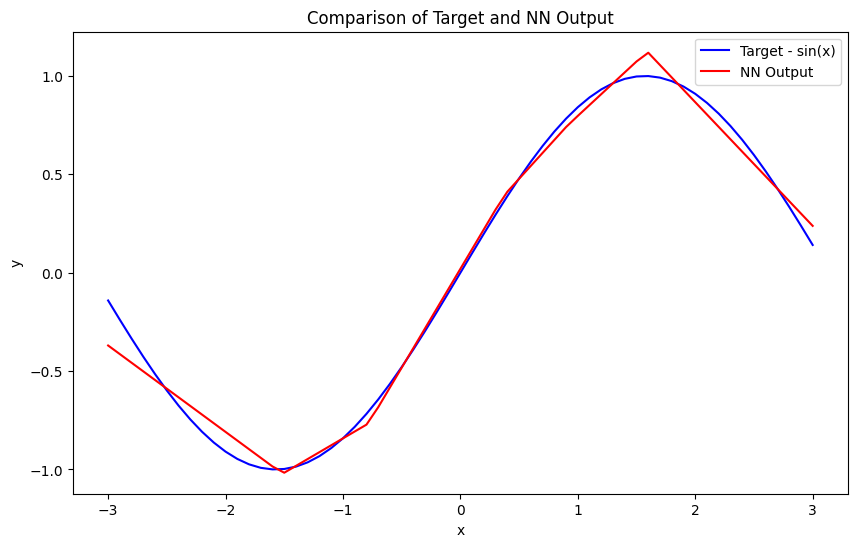

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Target - sin(x)', color='blue')
plt.plot(x, y_pred.flatten(), label='NN Output', color='red')
plt.title('Comparison of Target and NN Output')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [18]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Step 2: Preprocess the data
# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0
# Step 3: Define the model architecture
def create_model(hidden_layers=1, neurons=64, activation='relu', input_shape=(28, 28)):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape)) # Flatten the input
    for _ in range(hidden_layers):
        model.add(layers.Dense(neurons, activation=activation)) # Add hidden layers
    model.add(layers.Dense(10, activation='softmax')) # Output layer with softmax activation
    return model
# Example: Create a model with 2 hidden layers, 64 neurons each, using ReLU activation
model = create_model(hidden_layers=2, neurons=64, activation='relu', input_shape=(28, 28))
# Step 4: Compile the model
model.compile(optimizer='sgd', # Stochastic Gradient Descent
loss='sparse_categorical_crossentropy', # Loss function for integers
metrics=['accuracy'])
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)
# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7304 - accuracy: 0.8088 - val_loss: 0.3061 - val_accuracy: 0.9163
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3309 - accuracy: 0.9066 - val_loss: 0.2386 - val_accuracy: 0.9308
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.9188 - val_loss: 0.2086 - val_accuracy: 0.9412
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9290 - val_loss: 0.1870 - val_accuracy: 0.9460
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2236 - accuracy: 0.9362 - val_loss: 0.1684 - val_accuracy: 0.9545
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2029 - accuracy: 0.9415 - val_loss: 0.1546 - val_accuracy: 0.9592
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1862 - accuracy: 0.9465 - val_loss: 0.1471 - val_accuracy: